In [1]:
!pip install --upgrade pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=11e4addd0878d4b2d7f6293eabbd338e99ecfb9728871f6fd93e81eae83ffdb5
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [2]:
from pyforest import *

In [3]:
lazy_imports()

['from sklearn.impute import SimpleImputer',
 'import statsmodels.api as sm',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.linear_model import Ridge',
 'import textblob',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from pathlib import Path',
 'import keras',
 'from scipy import signal as sg',
 'from PIL import Image',
 'import pydot',
 'import plotly.graph_objs as go',
 'import fbprophet',
 'import numpy as np',
 'import xgboost as xgb',
 'import nltk',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from pyspark import SparkContext',
 'from openpyxl import load_workbook',
 'import sys',
 'from sklearn.linear_model import ElasticNetCV',
 'import pandas as pd',
 'from sklearn.linear_model import LogisticRegression',
 'import cv2',
 'from sklearn.decomposition import PCA',
 'import os',
 'import gensim',
 'import skimage',
 'from sklearn.linear_model impo

In [5]:
df = pd.read_csv("/content/Advertising.csv")

<IPython.core.display.Javascript object>

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.shape

(200, 5)

In [8]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [11]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [12]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

<IPython.core.display.Javascript object>

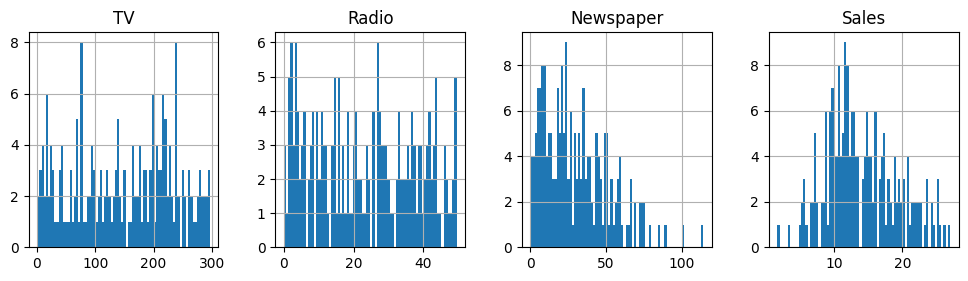

In [13]:
col = list(df)[0:]
df[col].hist(bins = 80,figsize = (12,50),layout = (14,4))
plt.show()

In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

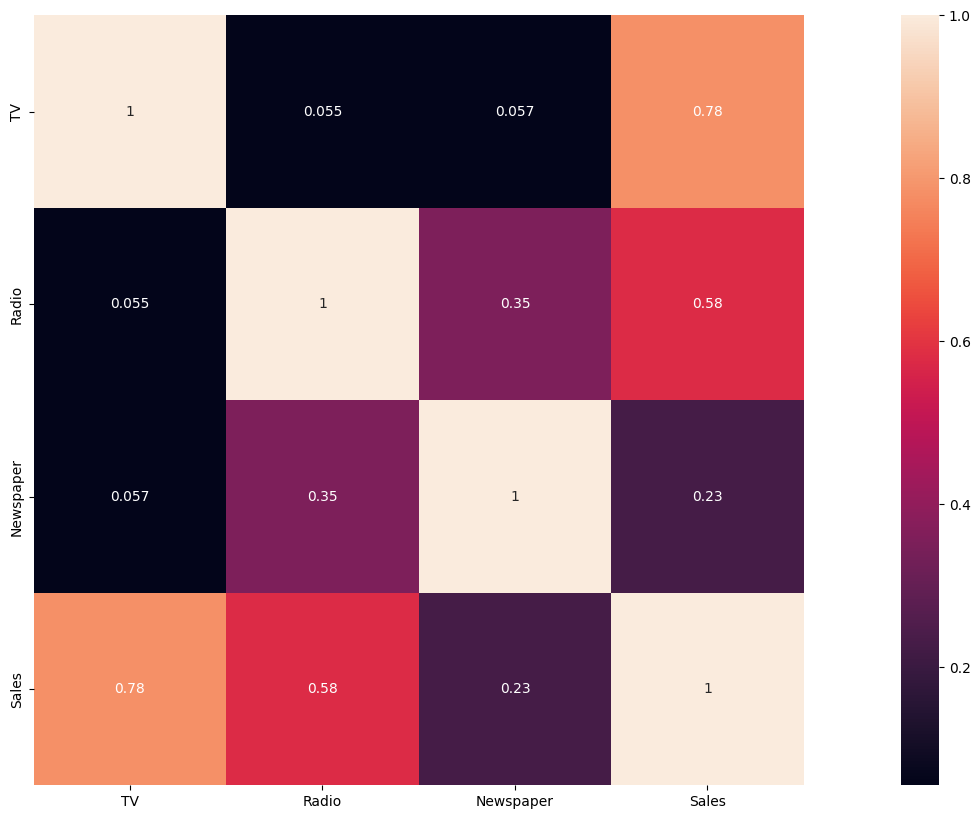

In [15]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot =  True,vmax = 1,square = True)
plt.show()

<IPython.core.display.Javascript object>

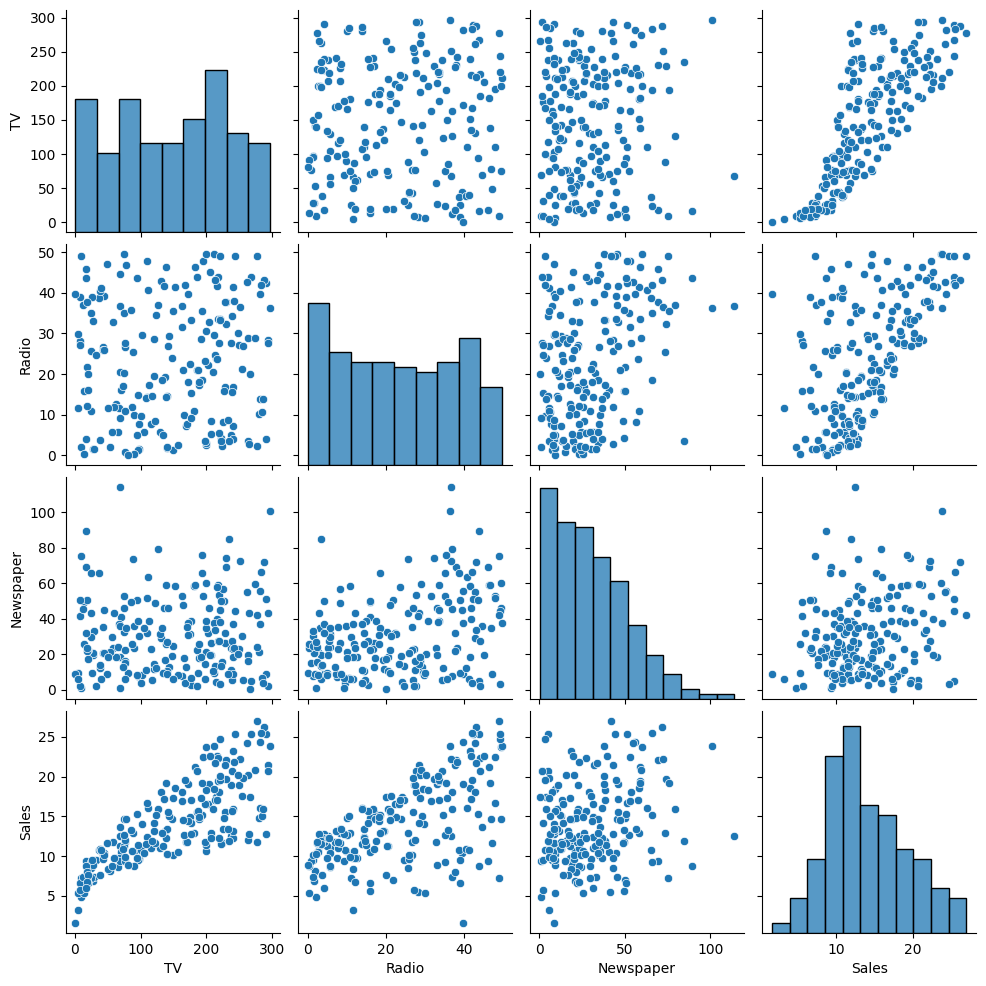

In [16]:
sns.pairplot(df)

In [17]:
x = df.drop("Sales",axis = 1)
y = df["Sales"]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

<IPython.core.display.Javascript object>

In [19]:
x_train

,TV,Radio,Newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [20]:
model  = LinearRegression()

<IPython.core.display.Javascript object>

In [21]:
model.fit(x_train,y_train)

LinearRegression()

In [22]:
model.coef_

array([0.0468431 , 0.17854434, 0.00258619])

In [23]:
model.intercept_

2.907947020816433

In [24]:
y_train_pred = model.predict(x_train)

In [25]:
y_train_pred

array([ 3.65921577,  7.25612637,  6.00481636, 18.46169785,  8.37406584,
       14.12454209, 15.0161764 , 20.40205426, 20.61382233, 19.61731651,
       24.16323248, 14.88403603,  6.73108467, 19.86205547, 18.92113796,
       12.49612522, 14.17816602,  6.11982211, 15.33821244,  9.59951578,
       12.04789746, 12.04846338,  8.52368581, 21.61141557, 23.30426145,
       12.24026439,  6.68855681, 17.80465348, 16.50075138,  8.78138524,
       20.39682769, 20.67376942, 24.24311844, 10.16119323, 10.51556751,
       16.43194712, 10.46014901,  6.66787113, 21.36473141, 14.43134771,
       15.49693622, 10.09789459, 14.96838524, 13.86965306,  8.38839734,
        8.85070713, 10.14373392,  8.16326623, 17.03095529, 15.20888698,
       16.80513965, 23.24354445, 13.44178745,  9.88629559, 18.11788026,
       14.82702155,  5.393657  , 12.87619027, 11.91409761, 12.09709362,
       11.73318833, 14.99985124,  4.60082043, 16.36095126, 12.08805647,
       17.79795119, 15.41316291, 18.63426135, 11.5184553 , 13.89

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [27]:
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,y_train_pred)*100

<IPython.core.display.Javascript object>

In [28]:
print("mean squared error of training data is {}".format(mse))
print("root mean squared error of training data is {}".format(rmse))
print("model score on the basis of training data is {}".format(r2))

mean squared error of training data is 3.0168306076596774
root mean squared error of training data is 1.736902590147092
model score on the basis of training data is 89.59372632325174


In [29]:
y_test_pred = model.predict(x_test)

In [30]:
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)*100

print("mean squared error of testing data is {}".format(mse))
print("root mean squared error of testing data is {}".format(rmse))
print("model score on the basis of testing data is {}".format(r2))

<IPython.core.display.Javascript object>

mean squared error of testing data is 1.9918855518287906
root mean squared error of testing data is 1.4113417558581587
model score on the basis of testing data is 89.27605914615384


In [ ]:
x_constant = sm.add_constant(x_train)

<IPython.core.display.Javascript object>

In [ ]:
model_summary= sm.OLS(y_train,x_constant).fit()

<IPython.core.display.Javascript object>

In [ ]:
model_summary.params

const        2.907947
TV           0.046843
Radio        0.178544
Newspaper    0.002586
dtype: float64

In [ ]:
df["TV"].mean()

147.0425

<IPython.core.display.Javascript object>

<Axes: xlabel='TV', ylabel='Count'>

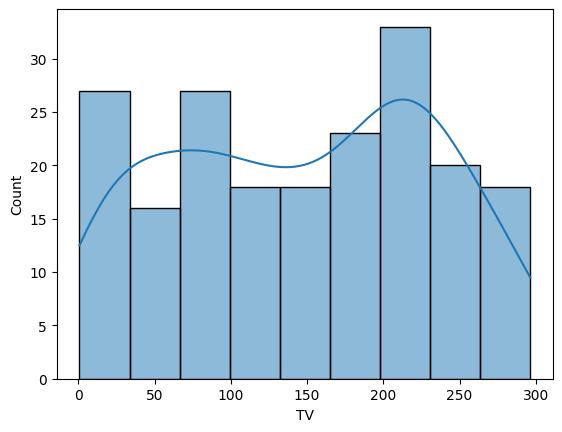

In [ ]:
sns.histplot(df["TV"],kde = True)

In [ ]:
x_train["TV"]

108     13.1
107     90.4
189     18.7
14     204.1
56       7.3
       ...  
133    219.8
137    273.7
72      26.8
140     73.4
37      74.7
Name: TV, Length: 160, dtype: float64

<IPython.core.display.Javascript object>

<Axes: >

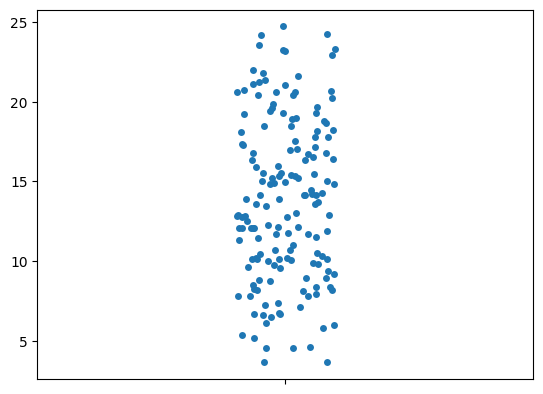

In [ ]:
sns.stripplot(y_train_pred)

<IPython.core.display.Javascript object>

<Axes: >

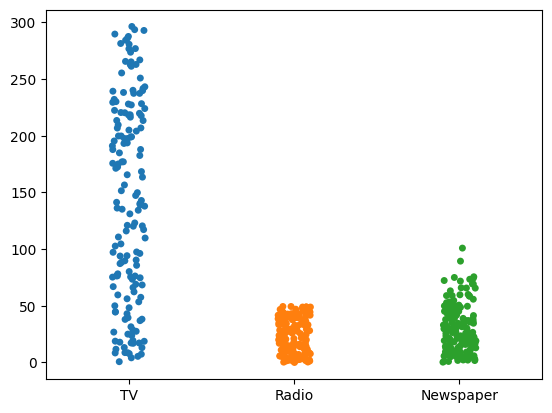

In [ ]:
sns.stripplot(x_train)

In [38]:
print("enter the details ")
tv = float(input("enter the sale of tv %:"))
radio = float(input("enter the sale of radio %:"))
newspaper=float(input("enter the sale of newpaper %:"))
prediction = model.predict([[tv,radio,newspaper]])
print("your sales is {}".format(prediction))

enter the details 
enter the sale of tv %:44.5
enter the sale of radio %:39.3
enter the sale of newpaper %:45.1
your sales is [12.12589482]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
df


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
